# Import libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read data from csv

In [3]:
train_df1 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD001.txt', delim_whitespace = True, header = None)
train_df2 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD002.txt', delim_whitespace = True, header = None)
train_df3 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD003.txt', delim_whitespace = True, header = None)
train_df4 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD004.txt', delim_whitespace = True, header = None)
test_df1 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/test_FD001.txt', delim_whitespace = True, header = None)
test_df2 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/test_FD002.txt', delim_whitespace = True, header = None)
test_df3 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/test_FD003.txt', delim_whitespace = True, header = None)
test_df4 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/test_FD004.txt', delim_whitespace = True, header = None)
RUL_df1 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/RUL_FD001.txt', delim_whitespace = True, header = None)
RUL_df2 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/RUL_FD002.txt', delim_whitespace = True, header = None)
RUL_df3 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/RUL_FD003.txt', delim_whitespace = True, header = None)
RUL_df4 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/RUL_FD004.txt', delim_whitespace = True, header = None)


C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\3152312976.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df1 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD001.txt', delim_whitespace = True, header = None)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\3152312976.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df2 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD002.txt', delim_whitespace = True, header = None)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\3152312976.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df3 = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/Data/train_FD003.txt', delim_white

# Generating column names

In [4]:
columns = ['unit_number', 'times_in_cycles'] + [f'ops_{i}' for i in range(1,4)] + [f'sensor_{i}' for i in range(1,22)]

# Assigning column names to datasets

In [5]:
train_df1.columns = columns
train_df2.columns = columns
train_df3.columns = columns
train_df4.columns = columns
test_df1.columns = columns
test_df2.columns = columns
test_df3.columns = columns
test_df4.columns = columns

# define datasets

Properties of Dataset:
Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

In [6]:
train_df = train_df1 
test_df = test_df1


# Summary Stats of dataset

In [7]:
train_df.describe()

# Most of the engines have cycles less than 156. 

,unit_number,times_in_cycles,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [8]:
train_df.info()

# Data types are either integer or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unit_number      20631 non-null  int64  
 1   times_in_cycles  20631 non-null  int64  
 2   ops_1            20631 non-null  float64
 3   ops_2            20631 non-null  float64
 4   ops_3            20631 non-null  float64
 5   sensor_1         20631 non-null  float64
 6   sensor_2         20631 non-null  float64
 7   sensor_3         20631 non-null  float64
 8   sensor_4         20631 non-null  float64
 9   sensor_5         20631 non-null  float64
 10  sensor_6         20631 non-null  float64
 11  sensor_7         20631 non-null  float64
 12  sensor_8         20631 non-null  float64
 13  sensor_9         20631 non-null  float64
 14  sensor_10        20631 non-null  float64
 15  sensor_11        20631 non-null  float64
 16  sensor_12        20631 non-null  float64
 17  sensor_13   

In [115]:
train_df.isnull().sum()

d_columns = list(train_df.columns)
d_columns
# No missing values found

['unit_number',
 'times_in_cycles',
 'ops_1',
 'ops_2',
 'ops_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'Maximum_cycle',
 'RUL']

# Calculated Dependent Variable 
As we are supposed to predict the RUL (Remaining useful life) we would need that in the train dataset 
as dependent variable. Considering that supervised scenario, we will calculate that using following formula. 
RUL = Maximum cycle - Current cycle

In [10]:
# Logic to get RUL?
# (1) Get the column that contains the engines and its maximum cycles
# (2) Merge the column with original dataset but ensure that values assigned on engines
# (3) Simply subtract the (1) - (2)

Calculated_cycle = train_df.groupby('unit_number')['times_in_cycles'].max().rename('Maximum_cycle')
train_df = train_df.merge(Calculated_cycle, on='unit_number')  # we need to specify common column in 'on' (works like inner join)

In [11]:
# Applying RUL formula

train_df['RUL'] = train_df['Maximum_cycle'] - train_df['times_in_cycles']

In [12]:
train_df.head(5)
#Got RUL as dependent variable

,unit_number,times_in_cycles,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Maximum_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187


# Correlation Analysis using Pearson Correlation 

<Axes: title={'center': 'correlation'}>

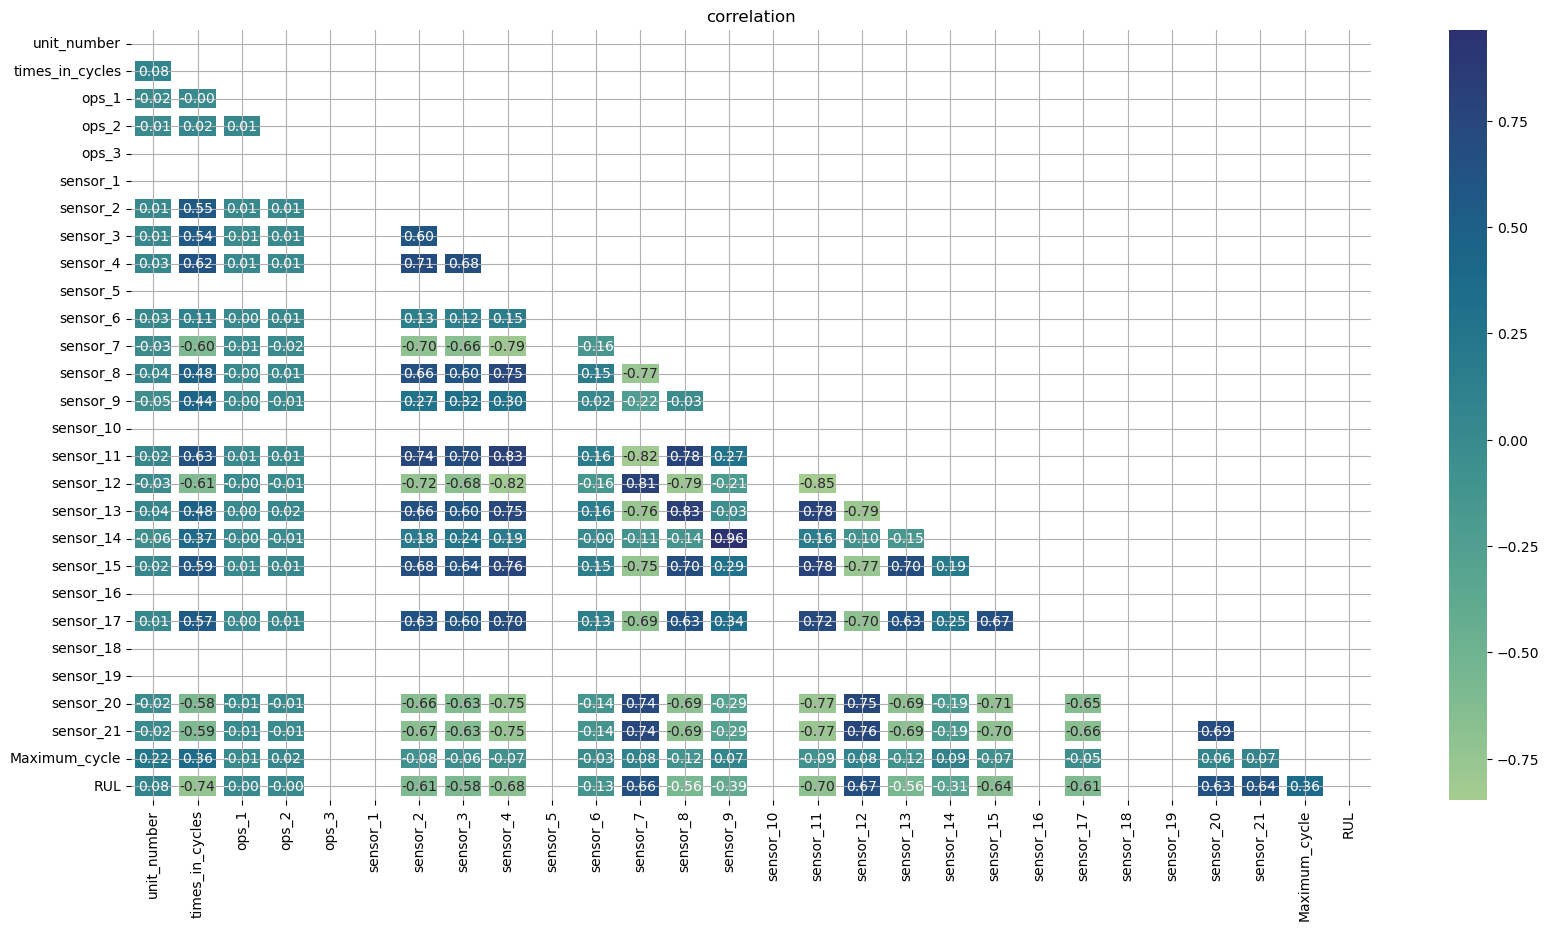

In [13]:
df_corr = train_df.corr()
mask = np.tril(np.ones(df_corr.shape),k = -1).astype(bool)
df_corr = df_corr.where(mask)

plt.figure(figsize = (20,10))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest' , linewidths=4.52)

In [14]:
highly_corr = []
for col in df_corr.columns: 
    for row in df_corr.index:
        if abs(df_corr.loc[col,row] > 0.95):
            highly_corr.append((col,row))
highly_corr

# These two columns are highly correlated and we need to remove them from dataset. 

[('sensor_14', 'sensor_9')]

# Plotting the Time series visualization 
We dont have time column, but we can consider cycle as implicit time as they increase we will see how sensors measurement
changes across different operational settings. 

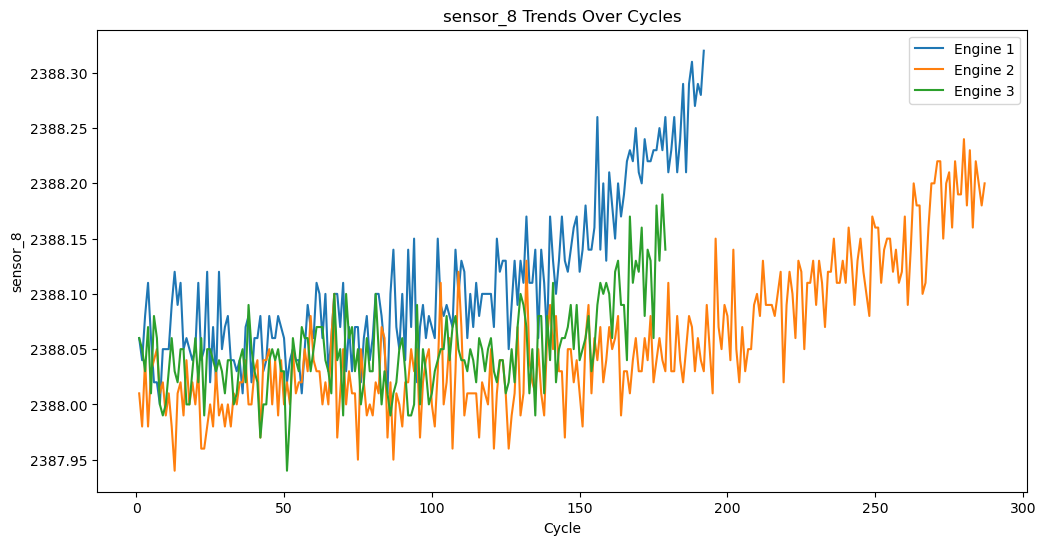

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot sensor trends for a few engines
def plot_sensor_trends(df, engine_ids, sensor_col):
    plt.figure(figsize=(12, 6))
    for engine_id in engine_ids:
        engine_data = df[df['unit_number'] == engine_id]
        plt.plot(engine_data['times_in_cycles'], engine_data[sensor_col], label=f'Engine {engine_id}')
    plt.xlabel('Cycle')
    plt.ylabel(sensor_col)
    plt.title(f'{sensor_col} Trends Over Cycles')
    plt.legend()
    plt.show()

# Example usage
plot_sensor_trends(train_df, engine_ids=[1,2,3], sensor_col='sensor_8')


# I dont think checking with respect to engine can make any sense or will be efficient approach. 

# To identify the outliers we will start with checking the normality of variables
--> To check normailty of variable we will use Q-Q Plot 


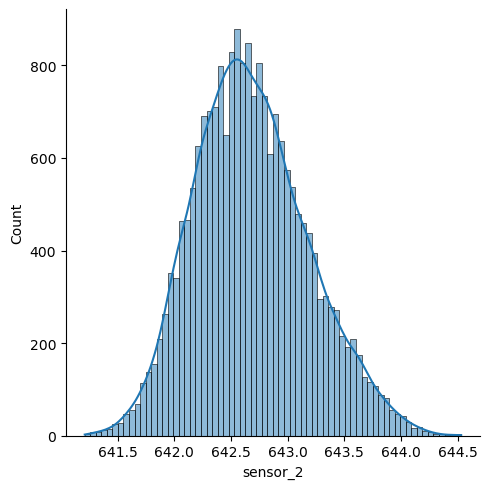

In [16]:
sns.displot(train_df['sensor_2'].dropna(), kde=True)

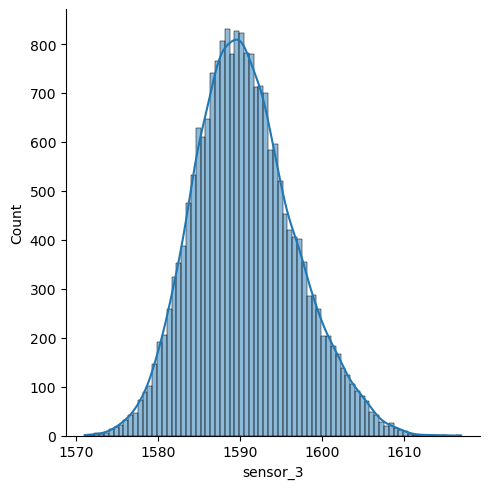

In [17]:
sns.displot(train_df['sensor_3'].dropna(), kde=True)

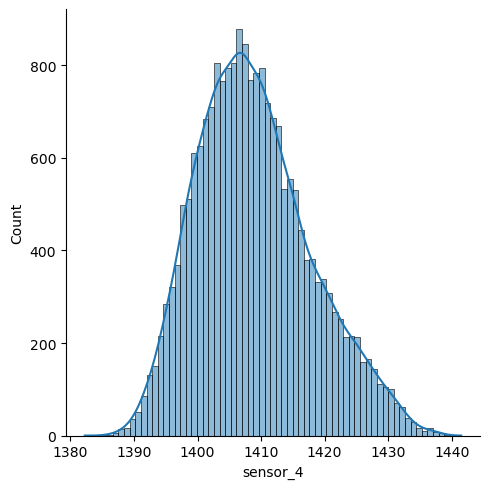

In [18]:
sns.displot(train_df['sensor_4'].dropna(), kde=True)

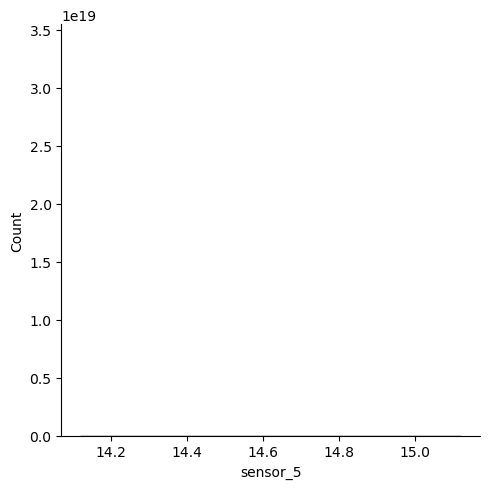

In [19]:
sns.displot(train_df['sensor_5'].dropna(), kde=True)

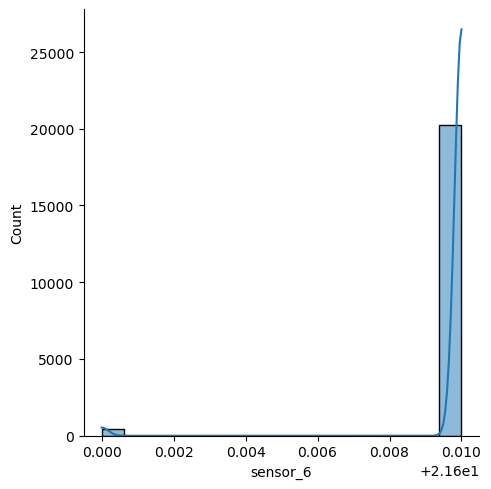

In [20]:
sns.displot(train_df['sensor_6'].dropna(), kde=True)

# range of values is so small that its not good idea to make changes in this column.

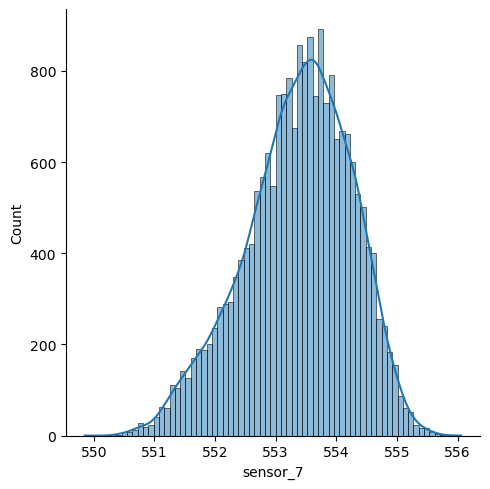

In [21]:
sns.displot(train_df['sensor_7'].dropna(), kde=True)

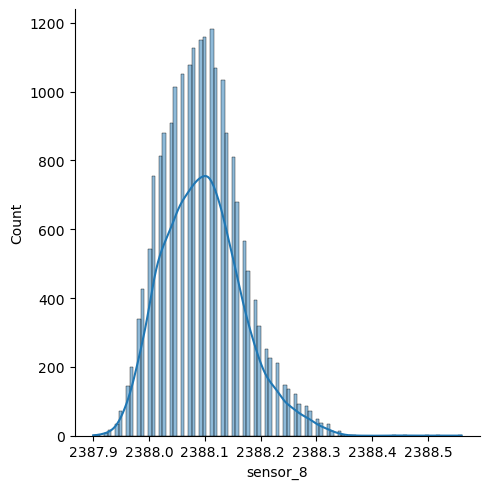

In [22]:
sns.displot(train_df['sensor_8'].dropna(), kde=True)

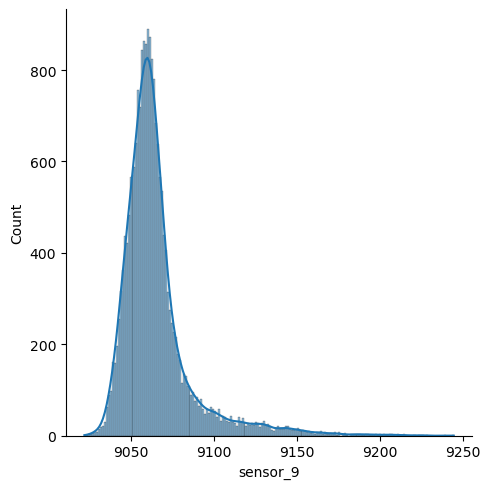

In [23]:
sns.displot(train_df['sensor_9'].dropna(), kde=True)

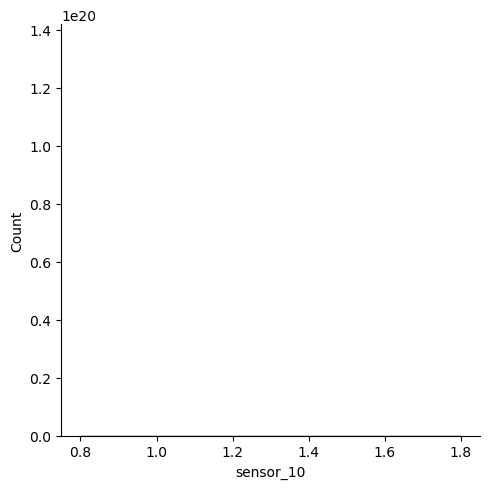

In [24]:
sns.displot(train_df['sensor_10'].dropna(), kde=True)

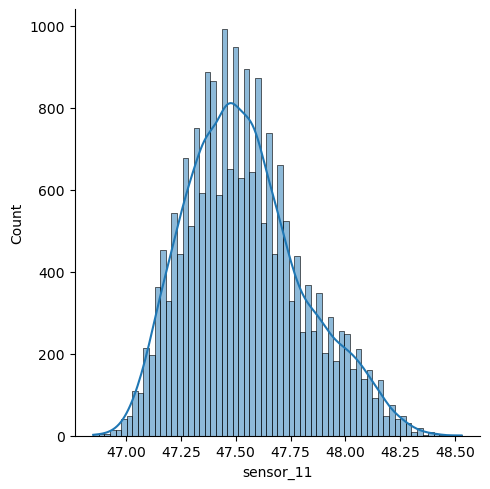

In [25]:
sns.displot(train_df['sensor_11'].dropna(), kde=True)

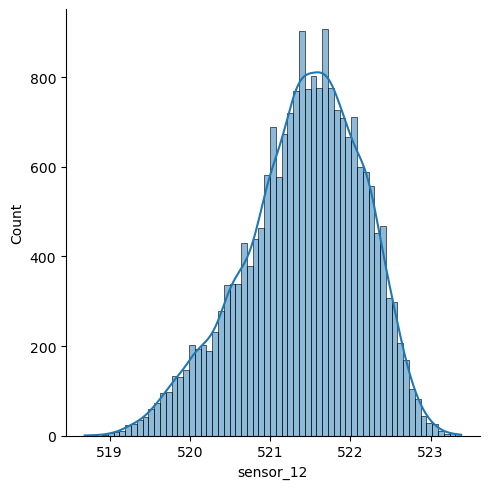

In [26]:
sns.displot(train_df['sensor_12'].dropna(), kde=True)

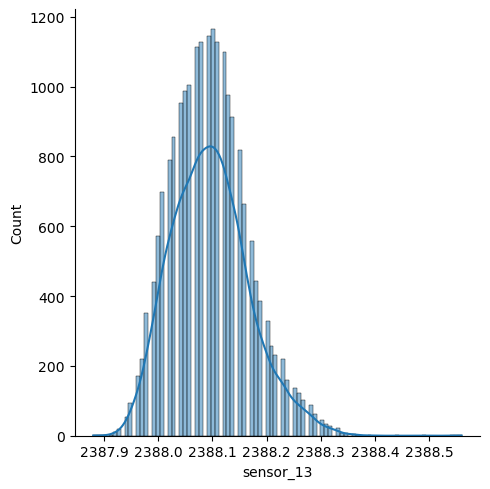

In [27]:
sns.displot(train_df['sensor_13'].dropna(), kde=True)

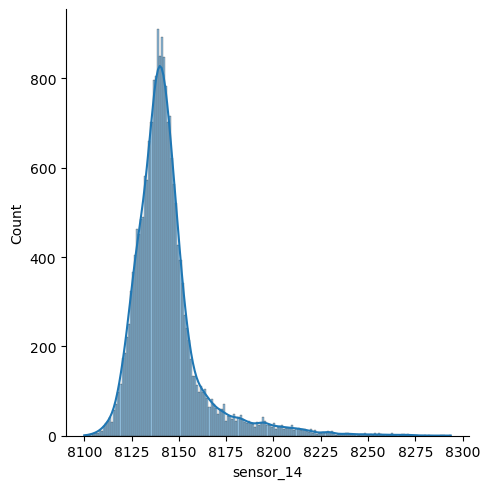

In [28]:
sns.displot(train_df['sensor_14'].dropna(), kde=True)

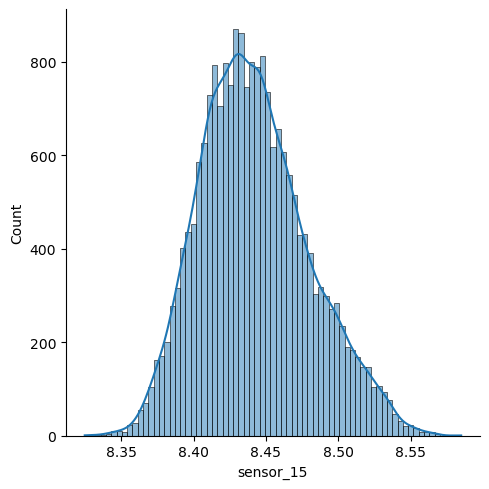

In [29]:
sns.displot(train_df['sensor_15'].dropna(), kde=True)

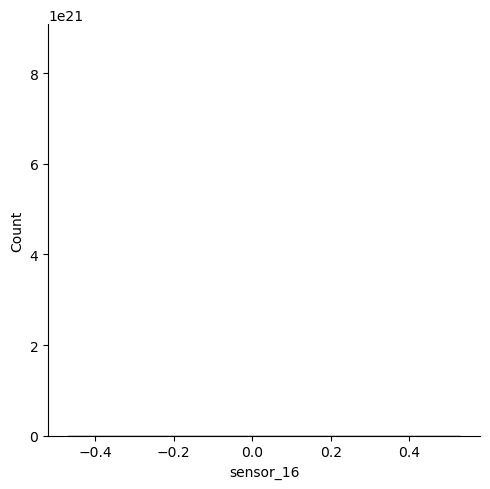

In [30]:
sns.displot(train_df['sensor_16'].dropna(), kde=True)

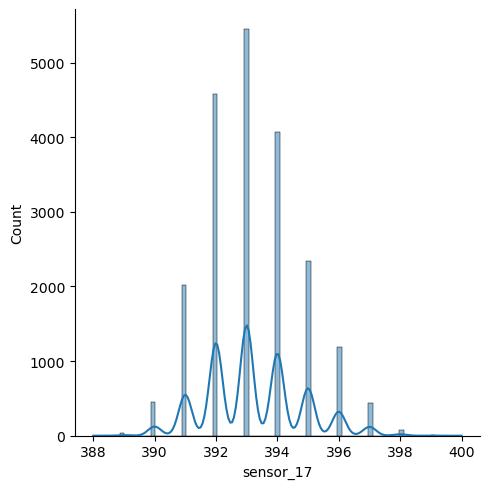

In [31]:
sns.displot(train_df['sensor_17'].dropna(), kde=True)

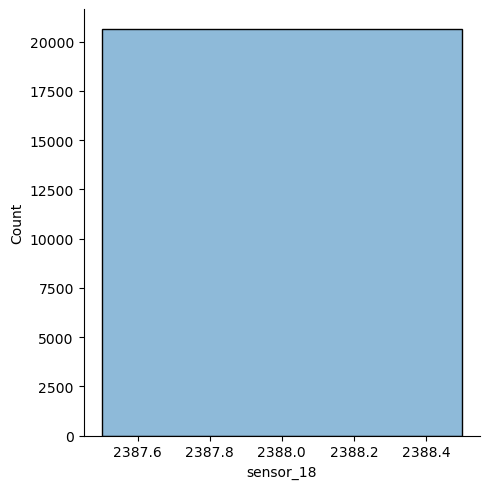

In [32]:
sns.displot(train_df['sensor_18'].dropna(), kde=True)

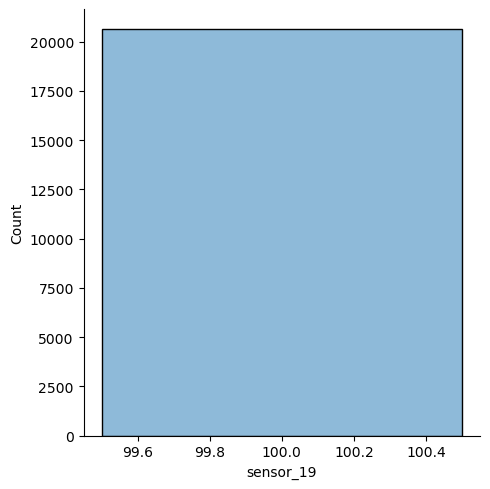

In [33]:
sns.displot(train_df['sensor_19'].dropna(), kde=True)

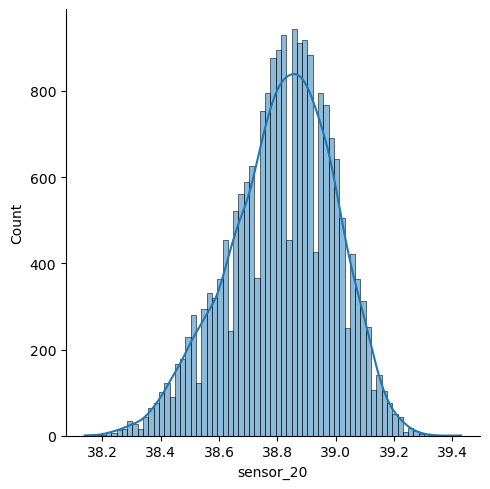

In [34]:
sns.displot(train_df['sensor_20'].dropna(), kde=True)

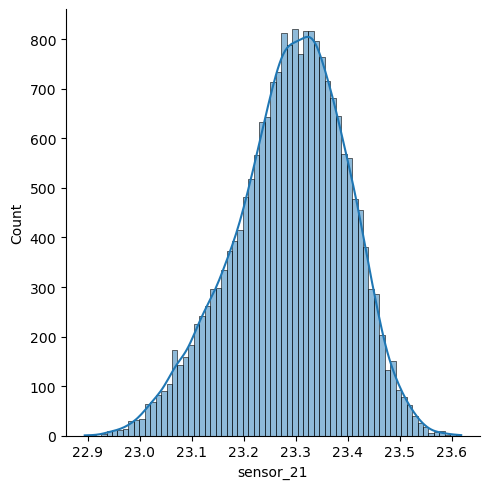

In [35]:
sns.displot(train_df['sensor_21'].dropna(), kde=True)

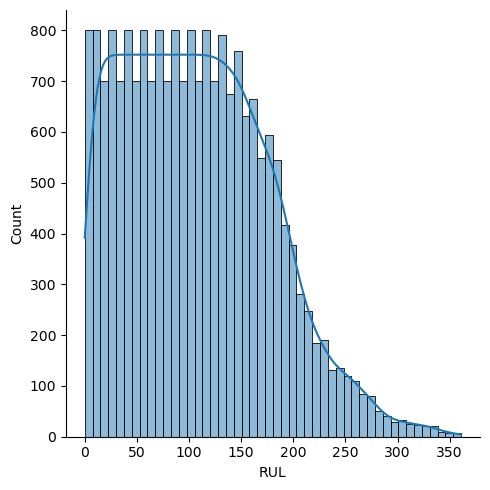

In [36]:
sns.displot(train_df['RUL'].dropna(), kde=True)


#Summary of Distribution Information:

List of sensors with Normal distribution:
 sensor_2, sensor_3, sensor_4, sensor_11, sensor_7 (slightly left skewed), sensor_8 (slightly right skewed), 
 sensor_14 (slightly right skewed),  senso_15, sensor_20, sensor_21, 

List of sensots with Non-Normal distribution:
 sensor_9 (rightly skewed), sensor_12 (left skewed), sensor_17, 

List of sensors we do not need to deal with as they have exetremly small variance, no extreme tails or isolated bins:
sensor_1, sensor_5, sensor_10, sensor_16,sensor_18, sensor_19, sensor_6

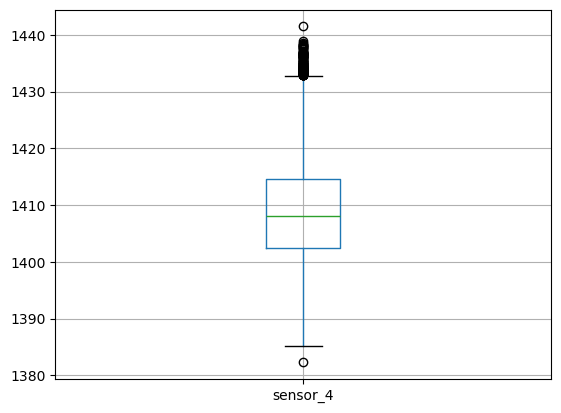

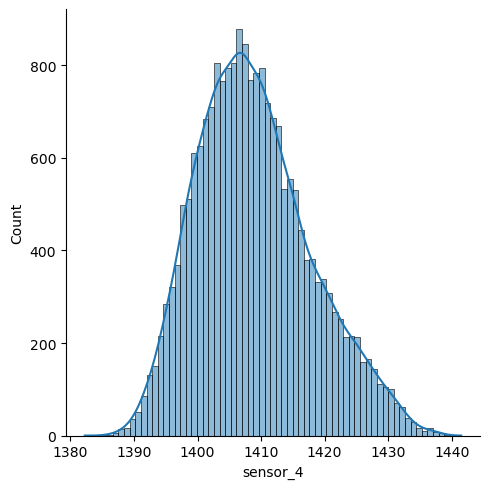

In [37]:
train_df.boxplot(column='sensor_4')
sns.displot(train_df['sensor_4'], kde=True)

# For Normally distributed columns we will use 3rd Standard deviation to remove Outliers
(1) We will calculate mean and standard deviation
(2) Then calculate upper boundary and lower boundary 
(3) Create function to get 

In [38]:
def third_sd_removal(df,sensor):

    copy_df = df.copy()
    for i in sensor:
        lower_boundary = df[i].mean() - 3 * df[i].std()
        upper_boundary = df[i].mean() + 3 * df[i].std()

        copy_df[i] = df[i].where((df[i] >= lower_boundary) & (df[i] <= upper_boundary), other= None) # Replacing outliers with NaN
        
    return(pd.DataFrame(copy_df))

# Lets try the outlier removal function for normal distribution columns results on sample columns like sensor_4

In [39]:
sensor = ['sensor_4']
outlier_free_sample = third_sd_removal(train_df,sensor)
outlier_free_sample

,unit_number,times_in_cycles,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Maximum_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


<Axes: >

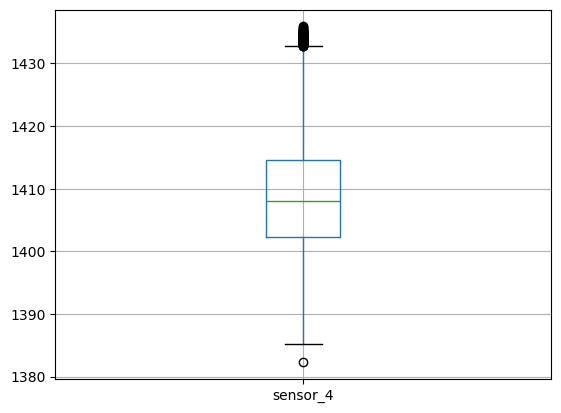

In [40]:
outlier_free_sample.boxplot('sensor_4')

# Results shows that values that are just outside of the whisker which means they are not extreme outliers and more
# chances are that they are legit values. 

In [41]:
# Now, we will apply 3rd standard deviation method on all the columns with normal distribution so, that 
# we can remove all possible outliers from those columns. 

In [42]:
sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_11', 'sensor_7', 'sensor_8', 'sensor_14',  'sensor_15', 'sensor_20', 'sensor_21']

In [43]:
train_df_clean1 = third_sd_removal(train_df,sensors)

# We have a new train dataset with fixed (NaN) outliers for normally distributed columns. Lets see if there is any change in distribution
# of right skewed column.

# Fixing Outliers in the Non-normally distributed columns
(1) Check if the column under consideration is staionary or non-stationary
(2) If it is stationary then apply IQR, if it is non-stationary then we need to detrend data first before apply IQR.
(3) How to check if it is stationary or not? --> We can use ADF Method

List of sensots with Non-Normal distribution:
 sensor_9 (rightly skewed), sensor_12 (left skewed), sensor_17

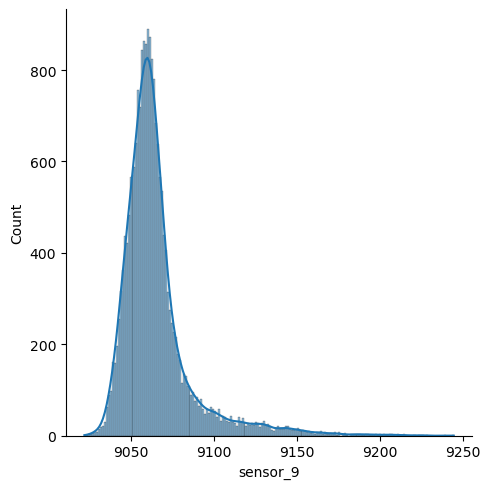

In [44]:
sns.displot(train_df_clean1['sensor_9'], kde= True)


#train_df_clean1.boxplot(column='sensor_9')

# Firsly, we will check which of the non-normally distributed columns are stationary and which of them are non-stationary.

In [45]:
def stationary_check(df,sensor_name):
    testing_dataset = df.copy()
    testing_dataset['RUL_bins'] = pd.cut(df['RUL'], bins=range(0,df['RUL'].max() + 10, 100))
    results = {}
    for name, group in testing_dataset.groupby('RUL_bins'):
        if len(group) > 1:
            results[name] = adfuller(group[sensor_name])[1] # extracting only p-value
    return(f'p-value of {sensor_name} is {results}')

In [46]:
stationary_check(train_df_clean1,'sensor_9')
# Stationary data

C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\555628323.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in testing_dataset.groupby('RUL_bins'):


"p-value of sensor_9 is {Interval(0, 100, closed='right'): 4.397899565348922e-23, Interval(100, 200, closed='right'): 6.515579039168754e-13, Interval(200, 300, closed='right'): 4.774395657982557e-05}"

In [47]:
stationary_check(train_df_clean1,'sensor_12')
# Stationary data

C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\555628323.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in testing_dataset.groupby('RUL_bins'):


"p-value of sensor_12 is {Interval(0, 100, closed='right'): 6.372957308622696e-29, Interval(100, 200, closed='right'): 4.2533331376383855e-14, Interval(200, 300, closed='right'): 3.2983282685075426e-08}"

In [48]:
stationary_check(train_df_clean1,'sensor_17')
# Stationary data

C:\Users\Hp\AppData\Local\Temp\ipykernel_5324\555628323.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in testing_dataset.groupby('RUL_bins'):


"p-value of sensor_17 is {Interval(0, 100, closed='right'): 5.2181409463619324e-30, Interval(100, 200, closed='right'): 8.867196966650166e-13, Interval(200, 300, closed='right'): 2.9162224910653174e-08}"

Non-normal distribution and stationary: sensor_12, sensor_9, sensor_17   (we can apply IQR to remove outliers, no need to detrend the data!)

Non-normal distribution and non-stationary: 

In [49]:
# Calculate the Q1 and Q3
# Calculate lower boundary and upper boundary
# 

def IQR_method(df,sensor_list):
    df_copy2 = df.copy()

    for i in sensor_list:
        Q1 = np.quantile(df[i], 0.25)
        Q3 = np.quantile(df[i], 0.75)
        IQR = Q3 - Q1 
        lower_boundary = Q1 - 1.5 * IQR
        upper_boundary = Q3 + 1.5 * IQR

        df_copy2[i] = df_copy2[i].where((df_copy2[i] >= lower_boundary) & (df_copy2[i] <= upper_boundary), other = None)

    return(df_copy2)

In [50]:
train_df_clean2 = IQR_method(train_df_clean1,['sensor_12', 'sensor_9', 'sensor_17'])

# Data after Outliers are Removed!! :))

In [51]:
train_df_clean2

,unit_number,times_in_cycles,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Maximum_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392.0,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392.0,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390.0,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392.0,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393.0,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397.0,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395.0,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,NaN,0.03,NaN,2388,100.0,38.44,NaN,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395.0,2388,100.0,38.29,23.0640,200,1


# Handling Missing values arised due to Outliers handling
As we replaced the outliers with 'NaN' because removing those values would have led us to exclude important
records. So, now we will impute missing values in the records. 

In [52]:
train_df_clean2.isnull().sum()

unit_number           0
times_in_cycles       0
ops_1                 0
ops_2                 0
ops_3                 0
sensor_1              0
sensor_2             31
sensor_3             47
sensor_4             36
sensor_5              0
sensor_6              0
sensor_7             34
sensor_8            107
sensor_9           1686
sensor_10             0
sensor_11            23
sensor_12           146
sensor_13             0
sensor_14           496
sensor_15            33
sensor_16             0
sensor_17            81
sensor_18             0
sensor_19             0
sensor_20            43
sensor_21            34
Maximum_cycle         0
RUL                   0
dtype: int64

In [53]:
train_df_clean2['sensor_9'].describe()

# Data shows that outliers are removed correctly as min and max after outlier removal are same as shown in the distplot (above) 
# bell curved. Only outliers are removed but they were 80% of the values, and it has weak correlation (0.39) with RUL
# so, its better to remove it instead of imputing 80% of values as it can result mislead trend. 

count    18945.000000
mean      9060.089402
std         11.472199
min       9028.640000
25%       9052.310000
50%       9059.550000
75%       9066.730000
max       9093.900000
Name: sensor_9, dtype: float64

In [54]:
dff =  train_df_clean2[['ops_1' , 'ops_2' , 'ops_3' , 'sensor_1' , 'sensor_2' , 'sensor_3' ,'sensor_4' , 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'RUL' ]][train_df_clean2['sensor_14'].isnull()]

In [55]:
dff.head(5)

,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,RUL
636,-0.0003,-0.0003,100.0,518.67,643.19,1593.16,1421.83,14.62,21.61,553.21,2388.10,NaN,1.3,47.74,521.26,2388.07,NaN,8.4977,0.03,21
638,0.0058,0.0002,100.0,518.67,642.48,1595.61,1415.88,14.62,21.61,553.16,2388.10,NaN,1.3,47.76,521.16,2388.13,NaN,8.4458,0.03,19
639,-0.0015,-0.0001,100.0,518.67,643.60,1594.41,1416.40,14.62,21.61,552.82,2388.06,NaN,1.3,47.68,520.48,2388.09,NaN,8.4779,0.03,18
640,0.0022,0.0002,100.0,518.67,643.11,1594.78,1420.33,14.62,21.61,552.97,2388.12,NaN,1.3,47.89,521.51,2388.04,NaN,8.4726,0.03,17
641,-0.0016,0.0000,100.0,518.67,643.00,1597.51,1422.22,14.62,21.61,553.11,2388.13,NaN,1.3,47.58,521.34,2388.13,NaN,8.4766,0.03,16


In [56]:
dff['sensor_6'].unique()

# sensor_6, sensor_16, sensor_5,sensor_1,ops_3

array([21.61])

In [57]:
dff = train_df_clean2[[ 'sensor_14' , 'sensor_6', 'sensor_16', 'sensor_5','sensor_1','ops_3']]

In [58]:
ff =  dff[['sensor_6', 'sensor_14']].groupby('sensor_6').agg(set)

ff

,sensor_14
sensor_6,
21.60,"{8141.2, 8141.46, 8141.25, 8141.89, 8141.85, 8..."
21.61,"{8141.91, 8141.16, 8141.41, 8141.66, 8141.27, ..."


In [59]:
ff =  dff[['sensor_16', 'sensor_14']].groupby('sensor_16').agg(set)
ff

,sensor_14
sensor_16,
0.03,"{8141.91, 8141.16, 8141.41, 8141.66, 8141.27, ..."


In [60]:
ff =  dff[['sensor_5', 'sensor_14']].groupby('sensor_5').agg(set)
ff

,sensor_14
sensor_5,
14.62,"{8141.91, 8141.16, 8141.41, 8141.66, 8141.27, ..."


In [61]:
ff =  dff[['sensor_1', 'sensor_14']].groupby('sensor_1').agg(set)
ff

,sensor_14
sensor_1,
518.67,"{8141.02, 8141.91, 8141.16, 8141.41, 8141.66, ..."


In [62]:
ff =  dff[['ops_3', 'sensor_14']].groupby('ops_3').agg(set)
ff

,sensor_14
ops_3,
100.0,"{8141.91, 8141.16, 8141.41, 8141.66, 8141.27, ..."


In [63]:
train_df_clean2['sensor_14'] = train_df_clean2['sensor_14'].fillna(train_df_clean2['sensor_14'].median())

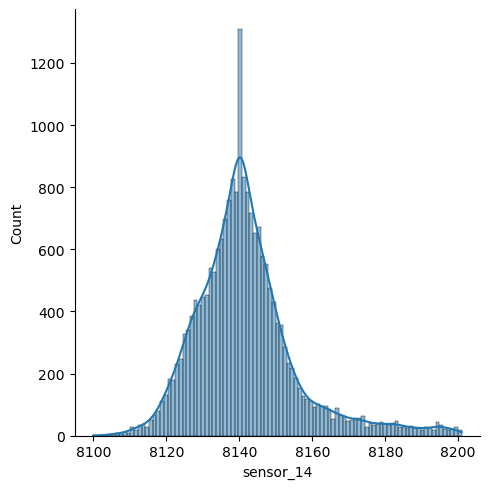

In [64]:
sns.displot(train_df_clean2['sensor_14'], kde = True)

# Missing values imputed. 

# Imputing Missing values using KNN Model
(1) Take the name of the column from list of missing values columns 
(2) For each column, extract all the columns in df.corr() that are strongly correlated with it (>0.70)
(3) Now, we have list of only correlated columns along with the columns containing missing values

# Columns to be imputed
sensor_2              31
sensor_3              47
sensor_4              36
sensor_7              34
sensor_8             107
sensor_9            1686 (To be dropped)
sensor_11             23
sensor_12            146 
sensor_14            496 (Imputed using median)
sensor_15             33
sensor_17             81
sensor_20             43
sensor_21             34

In [65]:
missing_list = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11', 'sensor_12', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

In [66]:
def impute_values(df,column_list,n_neighbors):
    
    df_copy3 = df.copy()

    highly_corr_columns = set()

    for col in column_list:
        for row in df_corr.index:

            if row != col and abs(df_corr.loc[col,row])>0.70:
                highly_corr_columns.add(row)


    final_columns = list(set(column_list + list(highly_corr_columns)))   # List of columns with missing values and those that are highly correlated to those columns

    df_subset = df[final_columns]

    imputer = KNNImputer(n_neighbors = n_neighbors)
    df_imputed = imputer.fit_transform(df_subset)

    df_copy3[final_columns] = df_imputed

    return df_copy3




In [67]:
train_df_clean3 = impute_values(train_df_clean2,missing_list, 5)

In [68]:
train_df_clean3.isnull().sum()
# Needs to drop sensor_9. Therefore, it was no imputed.
# All missing values are imputed. To check its impact lets compare difference in distribution before and after imputation.

unit_number           0
times_in_cycles       0
ops_1                 0
ops_2                 0
ops_3                 0
sensor_1              0
sensor_2              0
sensor_3              0
sensor_4              0
sensor_5              0
sensor_6              0
sensor_7              0
sensor_8              0
sensor_9           1686
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_15             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
Maximum_cycle         0
RUL                   0
dtype: int64

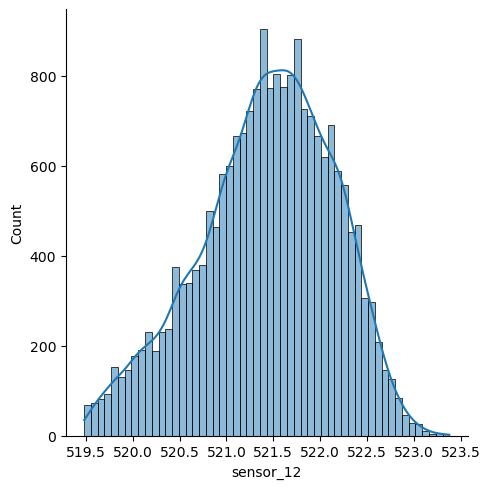

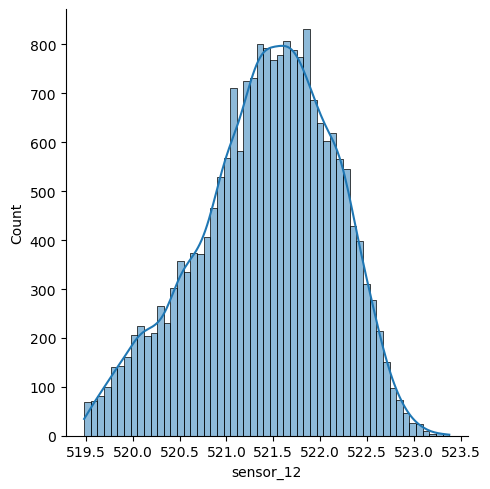

In [69]:
sns.displot(train_df_clean2['sensor_12'], kde = True)

sns.displot(train_df_clean3['sensor_12'], kde = True)

# It shows that after imputation its distribution improved (seems normal) and it has no impact on outliers. so, 
# values are imputed successfully. 

# Feature Engineering 
We will be computing following features in this section:
(1) Rolling Statistics
(2) Delta Features
(3) Interaction Features

# (1) Computing Rolling Statistics 
--> We will compute rolling statistic for those sensors that are strongly correlated to the RUL so, first task is to get columns.

In [70]:
columns_for_rollingstats = set()
for col in df_corr:
    for row in df_corr.index:
        if abs(df_corr.loc[col,row] > 0.70):
            columns_for_rollingstats.add((row))
columns_for_rollingstats

{'sensor_11',
 'sensor_12',
 'sensor_2',
 'sensor_4',
 'sensor_7',
 'sensor_8',
 'sensor_9'}

In [71]:
columns_rollstats = ['sensor_11',
 'sensor_12',
 'sensor_2',
 'sensor_4',
 'sensor_7',
 'sensor_8',
 'sensor_9']
#train_df_clean3['sensor_11_rollingstat'] = train_df_clean3.groupby('unit_number')['senor_11'].transform(lambda x: x.rolling(window=10,min_period = 1).mean())

In [72]:
# Lets create a function that can take list of columns can return rolling stats for all of them

def rolling_stats_function(df,input_columns):
    df_copy4 = df.copy()

    for col in input_columns:
        df_copy4[f"{col}_stats"] = df_copy4.groupby('unit_number')[col].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

    return df_copy4

In [73]:
train_df_clean4 = rolling_stats_function(train_df_clean3, columns_rollstats)

In [74]:
train_df_clean4.columns

Index(['unit_number', 'times_in_cycles', 'ops_1', 'ops_2', 'ops_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'Maximum_cycle',
       'RUL', 'sensor_11_stats', 'sensor_12_stats', 'sensor_2_stats',
       'sensor_4_stats', 'sensor_7_stats', 'sensor_8_stats', 'sensor_9_stats'],
      dtype='object')

In [75]:
train_df_clean4[['sensor_4_stats', 'sensor_4' , 'sensor_7_stats', 'sensor_7']]

,sensor_4_stats,sensor_4,sensor_7_stats,sensor_7
0,1400.600000,1400.60,554.360000,554.360
1,1401.870000,1403.14,554.055000,553.750
2,1402.646667,1404.20,554.123333,554.260
3,1402.452500,1401.87,554.205000,554.450
4,1403.206000,1406.22,554.164000,554.000
...,...,...,...,...
20626,1426.079000,1428.63,551.477000,551.430
20627,1427.288000,1433.58,551.410000,550.860
20628,1427.449000,1428.18,551.427000,550.940
20629,1427.787000,1426.53,551.432200,551.662


# (2) Creating Delta features
--> For those variables that have small variance so, to identify thos variables we will use variance method to identify those columns

In [76]:
variances = train_df_clean4.var()
variance_tb = pd.DataFrame({"Columns": variances.index, "values": variances.values})
variance_tb

,Columns,values
0,unit_number,8.542545e+02
1,times_in_cycles,4.744591e+03
2,ops_1,4.784340e-06
3,ops_2,8.588541e-08
4,ops_3,0.000000e+00
5,sensor_1,4.273435e-21
6,sensor_2,2.472641e-01
7,sensor_3,3.687933e+01
8,sensor_4,8.019174e+01
9,sensor_5,1.152399e-23


In [77]:
train_df_clean4['sensor_21'].unique()

array([23.419 , 23.4236, 23.3442, ..., 23.1218, 23.023 , 22.9735])

In [78]:
Columns_for_delta = variance_tb[variance_tb['values'] < 0.01]['Columns']
clmns_for_delta = Columns_for_delta.tolist()
columns_delta = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 
                 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 
                 'sensor_20', 'sensor_21']


In [79]:
def delta_function(df,clmns):
    df_copy5 = df.copy()
    for col in clmns:
        df_copy5[f'{col}_delta'] = df_copy5.groupby('unit_number')[col].transform(lambda x: x.diff().fillna(0))
    
    return df_copy5

In [80]:
train_df_clean5 = delta_function(train_df_clean4,columns_delta)

In [81]:
train_df_clean5.columns

Index(['unit_number', 'times_in_cycles', 'ops_1', 'ops_2', 'ops_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'Maximum_cycle',
       'RUL', 'sensor_11_stats', 'sensor_12_stats', 'sensor_2_stats',
       'sensor_4_stats', 'sensor_7_stats', 'sensor_8_stats', 'sensor_9_stats',
       'sensor_2_delta', 'sensor_3_delta', 'sensor_4_delta', 'sensor_7_delta',
       'sensor_8_delta', 'sensor_9_delta', 'sensor_11_delta',
       'sensor_12_delta', 'sensor_13_delta', 'sensor_14_delta',
       'sensor_15_delta', 'sensor_17_delta', 'sensor_20_delta',
       'sensor_21_delta'],
      dtype='object')

In [82]:
# example of trend tracking for sensor_3 to check how delta columns are working 
train_df_clean5[['sensor_3', 'sensor_3_delta']].head(10)

,sensor_3,sensor_3_delta
0,1589.70,0.00
1,1591.82,2.12
2,1587.99,-3.83
3,1582.79,-5.20
4,1582.85,0.06
5,1584.47,1.62
6,1592.32,7.85
7,1582.96,-9.36
8,1590.98,8.02
9,1591.24,0.26


# we will evaluate if we it would be better to create interaction features or not!


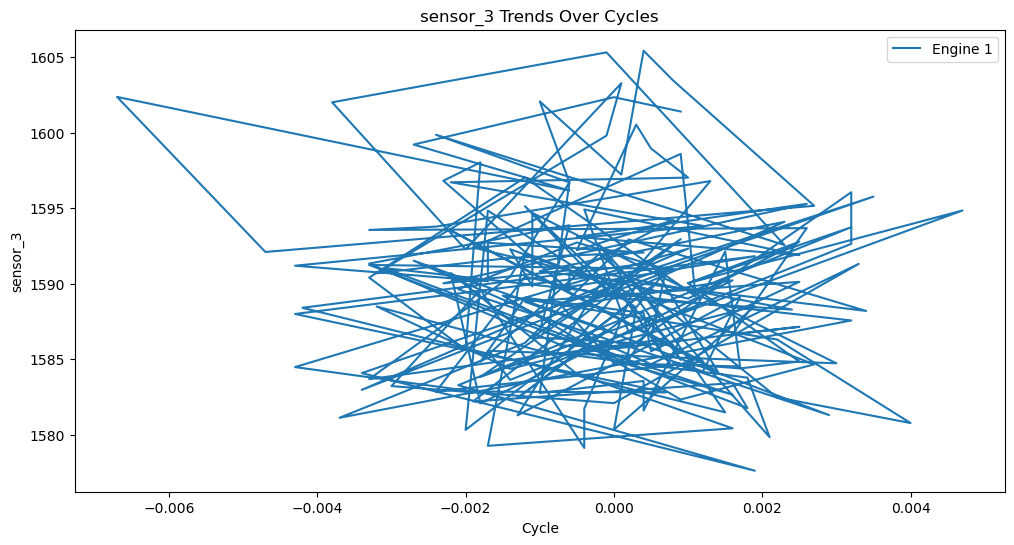

In [83]:

# Example: Plot sensor trends for a few engines
def plot_sensor_trends(df, engine_ids, sensor_col):
    plt.figure(figsize=(12, 6))
    for engine_id in engine_ids:
        engine_data = df[df['unit_number'] == engine_id]
        plt.plot(engine_data['ops_1'], engine_data[sensor_col], label=f'Engine {engine_id}')
    plt.xlabel('Cycle')
    plt.ylabel(sensor_col)
    plt.title(f'{sensor_col} Trends Over Cycles')
    plt.legend()
    plt.show()

# Example usage
plot_sensor_trends(train_df, engine_ids=[1], sensor_col='sensor_3')


# I dont think checking with respect to engine can make any sense or will be efficient approach. 

# Analysis on why we do not need to create Interaction Features?
After analyzing the relationships between operational settings and sensors (for multiple attributes), I think relationship
is complex and non-linear and considering the importance of the effect of operational settings and sensors we can't ignore this relationship, so therefore to accomodate this relationship we are likely to use Tree-based models instead of using linear machine learning models. 

# Feature Selection Process

We will use random forest model to get an idea about the 

In [84]:
X = train_df_clean5.iloc[:,:-1]
Y = train_df_clean5.iloc[:,-1]
features = X.columns.tolist()
# Train Test Split  (80% and 20%)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

importance = pd.DataFrame({'feature': features,'Importance': rf.feature_importances_}).sort_values(by='Importance',ascending=False)
print(importance)

threshold = 0.02
selected_features = importance[importance['Importance'] > threshold]['feature'].tolist()
print(f"\nSelected features with importance > {threshold}:", selected_features)
print(f"Number of selected features: {len(selected_features)}")

y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"RMSE on test set: {rmse:.2f}")

            feature  Importance
25        sensor_21    0.317904
28  sensor_11_stats    0.089936
31   sensor_4_stats    0.065560
29  sensor_12_stats    0.045524
32   sensor_7_stats    0.029882
30   sensor_2_stats    0.028932
27              RUL    0.017913
44  sensor_14_delta    0.015859
7          sensor_3    0.015631
37   sensor_4_delta    0.015530
19        sensor_15    0.015047
42  sensor_12_delta    0.014518
8          sensor_4    0.014493
36   sensor_3_delta    0.014453
40   sensor_9_delta    0.014304
45  sensor_15_delta    0.014071
13         sensor_9    0.013985
1   times_in_cycles    0.013929
35   sensor_2_delta    0.013890
6          sensor_2    0.013863
2             ops_1    0.013850
38   sensor_7_delta    0.013701
11         sensor_7    0.013665
16        sensor_12    0.013567
41  sensor_11_delta    0.012984
47  sensor_20_delta    0.012414
24        sensor_20    0.012301
15        sensor_11    0.012159
34   sensor_9_stats    0.012150
33   sensor_8_stats    0.011743
0       

Although, we can see that only few columns are important but we will keep columns due to following reasons:
# Reasons to Keep More
(1) Small Contributions Add Up: Features with scores like 0.03 or 0.01 might seem minor, but together, they could boost accuracy (e.g., 18 features at 0.03 = 0.54 total importance).
(2) Complex Patterns: RUL might depend on interactions between sensors. Dropping too many columns could miss those combos.
(3) Safety Net: With only 6, if one’s noisy or less reliable in new data (e.g., test set), you’re stuck. More features spread the risk.

In [112]:
train_df_clean5['sensor_9'].max()

9093.9

In [117]:
import os

In [119]:
data_path: str = os.path.join('artifacts', 'data.csv')
os.makedirs(os.path.dirname(data_path), exist_ok=True)
train_df_clean5.to_csv(data_path, index=False, header=True) 

In [122]:
df = pd.read_csv('C:/Users/Hp/Projects/Timeseriesproject/Notebook/artifacts/data.csv')
df.head(10)

,unit_number,times_in_cycles,ops_1,ops_2,ops_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_8_delta,sensor_9_delta,sensor_11_delta,sensor_12_delta,sensor_13_delta,sensor_14_delta,sensor_15_delta,sensor_17_delta,sensor_20_delta,sensor_21_delta
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.0,0.00,0.0000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,-0.02,-2.12,0.02,0.62,0.05,-7.13,0.0123,0.0,-0.06,0.0046
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.04,8.87,-0.22,0.14,-0.04,1.74,-0.0140,-2.0,-0.05,-0.0794
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,-3.46,-0.14,0.44,0.05,0.60,-0.0496,2.0,-0.07,0.0297
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,-0.05,5.67,0.15,-0.67,-0.04,-0.03,0.0612,1.0,0.02,0.0305
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,-0.04,-5.47,-0.12,-0.51,-0.01,-0.95,-0.0186,-2.0,0.08,-0.0375
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.00,9.45,0.20,0.64,0.00,-0.53,-0.0134,1.0,0.12,0.0105
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,-0.02,-18.33,-0.12,0.15,0.00,-1.25,0.0102,-1.0,-0.13,-0.0668
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.05,5.66,0.05,-0.68,0.02,-5.38,-0.0348,1.0,0.08,0.0960
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.00,5.24,-0.26,0.00,0.01,3.69,0.0558,1.0,-0.10,0.0628
